### Overview
Arithmetic operations, such as addition, substraction, multiplication, and division are heavily used in all image processing and computer vision applications. 

Let's look into two simple operations on images that change the brightness and contrast of the image which use the arithmetic operations like addition and multiplication respectively.

### Datatype Conversion
An image is represented as a numpy array once it's read using cv2.imread function. The default datatype of this object is unsigned integer (uint8). For most Arithmentic operations like multiplication or division, we need to convert the array type to floating point with each pixel having 16, 32 or 64 bits of data. This helps prevent overflow while working with the images.

When using multiplication or divsion float32 datatype is enough for most image processing operations. 

In [1]:
# importing libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (6.0, 6.0)
mpl.rcParams['image.cmap'] = 'gray'

In [3]:
# read image
sample_image = cv2.imread(DATA_PATH + "images/face.jpg")

In [5]:
# scaling
scalingFactor = 1/255.0

# convert unsigned int to float
sample_image = np.float32(sample_image)

# scale the values so that they lie between [0, 1]
sample_image = sample_image * scalingFactor

The scaling factor reduces the range of 0-255 to 0-1, hence all the floating point numbers now range between 0-1. When we convert back to unsigned integer we use the reciprocal of the scaling factor and the range is converted from 0-1 to 0-255.

In [6]:
# convert back to unsigned int
sample_image = sample_image * (1.0/scalingFactor)
sample_image = np.uint8(sample_image)

### Contrast Enhancement
Contrast enhancement is an image processing technique or the difference in color and light between parts of it, it touched up in order to improve its perception by human eye. 

One of the easiest ways to improve contrast of an image is Intensity Scaling

In this approach, a scale factor (  𝛼  ) is multiplied with intensity values of all the pixels. Intensity scaling is represented by the following equation

𝐼𝑜=𝛼𝐼

### Implementation for Contrast Enhancement
In the code below, we will apply the above mentioned formulas to get contrast enhanced images.

We increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


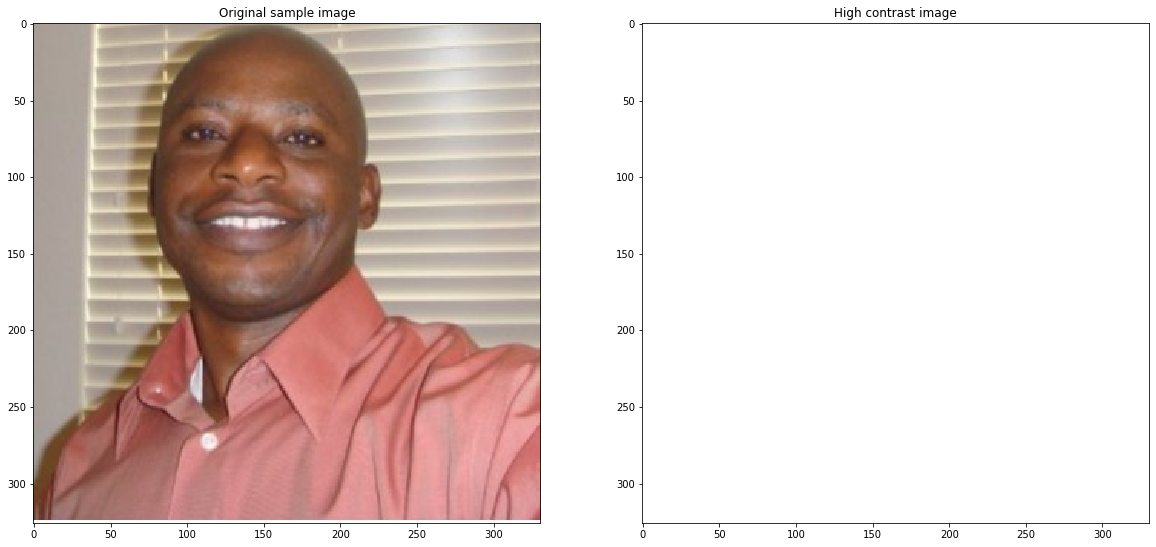

In [10]:
# contrast percentage
contrast_percent = 30

# multiply with scaling factor to increase contrast
contrast_high = sample_image * (1 + contrast_percent / 100)

# display the outputs
plt.figure(figsize = [20, 20])
plt.subplot(121)
plt.imshow(sample_image[..., ::-1])
plt.title("Original sample image")

plt.subplot(122)
plt.imshow(contrast_high[..., ::-1])
plt.title("High contrast image")

plt.show()

### What's wrong?
What's the problem with the images? Let us do a quick check of the image properties.

In [11]:
print("Original image datatype: {}".format(sample_image.dtype))
print("Contrast image datatype: {}".format(contrast_high.dtype))

print("Original image highest pixel intensity: {}".format(sample_image.max()))
print("Contrast image highest pixel intensity: {}".format(contrast_high.max()))

Original image datatype: uint8
Contrast image datatype: float64
Original image highest pixel intensity: 255
Contrast image highest pixel intensity: 331.5


### Issue with Contrast Enhancement implementation
The white display in case of contrast_high is more of a display issue. Display functions expect the images to be in either of these 2 formats:

If the image is in float datatype, then the range should be [0,1]. Anything above 255 is considered as white.

If the image is in int datatype, then the range should be [0,255]

### Solution 
We can see that the datatype of contrast_high is float and the max value is 331.5. This means that in order to fix the display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So, to get rid of the problem, we can do the following:

- Change the intensity values to 0 ~ 255 and change the data type to uint8.
- If we want to keep the image in float format, then Normalize the instensity values so that it lies in [0,1]

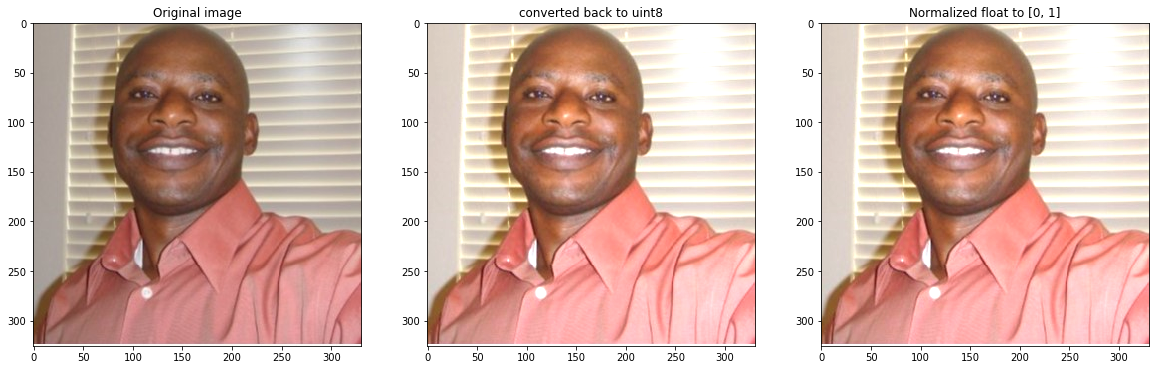

In [12]:
# contrast percent = 30
contrast_percent = 30

# change values to [0, 255] and back to uint8 for display
contrast_sample_image = sample_image * (1 + contrast_percent / 100)
clipped_contrast_sample_image = np.clip(contrast_sample_image, 0, 255)
contrast_high_clipped_uint8 = np.uint8(clipped_contrast_sample_image)

# convert the range to [0, 1] and keep it in float format
contrast_high_normalized = (sample_image * (1 + contrast_percent / 100)) / 255
contrast_high_normalized_clipped = np.clip(contrast_high_normalized, 0, 1)

plt.figure(figsize=[20, 20])
plt.subplot(131)
plt.imshow(sample_image[..., ::-1])
plt.title("Original image")

plt.subplot(132)
plt.imshow(contrast_high_clipped_uint8[..., ::-1])
plt.title("converted back to uint8")

plt.subplot(133)
plt.imshow(contrast_high_normalized_clipped[..., ::-1])
plt.title("Normalized float to [0, 1]")

plt.show()

### Brightness Enhancement
Brightness is shifting of intensity values to a high level. The dark and light pixels both get their values shifted by some constant value. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brighter, the intensity values should be increased by some offset ( 𝛽 ) and vice-versa.

If 𝐼 is the input image, and 𝐼𝑜 is the output image, brightness enhanced image is given by the equation

𝐼𝑜=𝐼+𝛽
### Brightness Enhancement implementation
In the code below, we will apply the above mentioned formulas to get brightness enhanced images.

Here we increase the brightness by 50 intensity levels. 

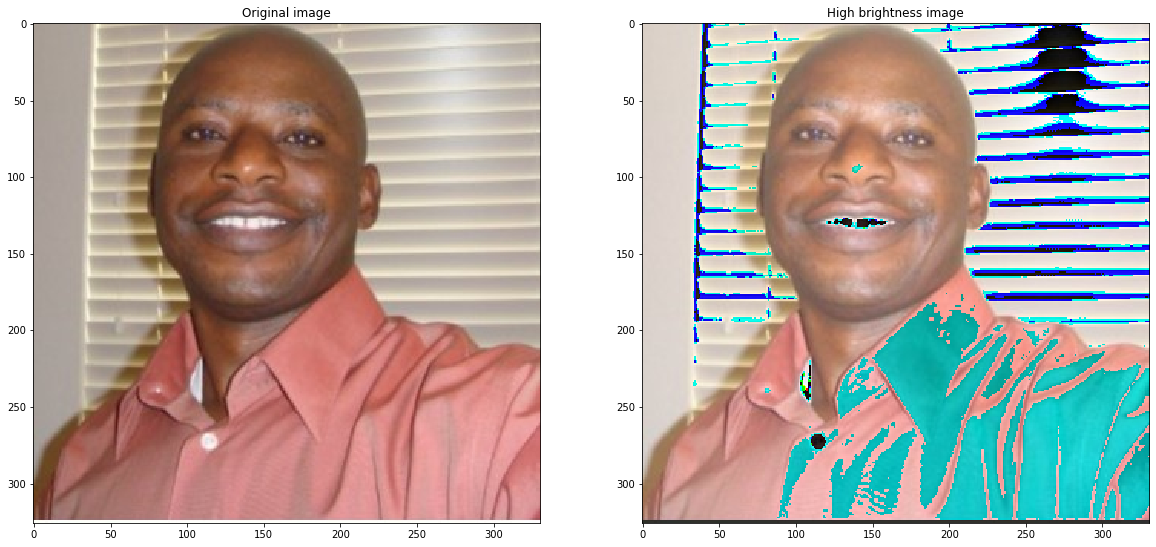

In [13]:
# brightness offset
brightness_offset = 50

# add the offset for increasing brightness
bright_high = sample_image + brightness_offset

# display the outputs
plt.figure(figsize=[20, 20])
plt.subplot(121)
plt.imshow(sample_image[..., ::-1])
plt.title("Original image")

plt.subplot(122)
plt.imshow(bright_high[..., ::-1])
plt.title("High brightness image")

plt.show()

### What's wrong?
What's the problem with the images? Let us do a quick check of the image properties.

In [14]:
print("Original image datatype: {}".format(sample_image.dtype))
print("Brightness image datatype: {}".format(bright_high.dtype))

print("Original image highest pixel intensity: {}".format(sample_image.max()))
print("Brightness image highest pixel intensity: {}".format(bright_high.max()))

Original image datatype: uint8
Brightness image datatype: uint8
Original image highest pixel intensity: 255
Brightness image highest pixel intensity: 255


### Issue with Brightness Enhancement implementation 
The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in brightHigh image should have been 305. But we can see that the highest pixel intensity is in brightHigh image is 255.

This is happening because of the uint8 datatype. Since the maximum value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an overflow.

This is a much more serious problem than the display issue we encountered earlier. 

Let's use an example to understand what was going on in the above case.

In [15]:
# sample 2 x 2 matrix of type uint8
a = np.array([[100, 110],
             [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


In [16]:
# add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


You can see that the element a[1,1] should have been 260. but instead it overflowed and rolled over. There will be a similar problem if we subtract.

Let us see another interesting problem.

In [17]:
print(a - 130)

[[226 236]
 [246   0]]


What about this?

In [18]:
print(a + (-130))

[[-30 -20]
 [-10   0]]


In the first case, both operands (a and 130) are uint8 and thus the output is uint8 and hence the underflow.

But in the second case, the 2nd operand has a type int16. Thus, the final output becomes int16 and thus, doesnt underflow.

This shows a major Pitfall of using uint8 while dealing with arithmetic operations on images.

Thus, it is important to convert the images to int or float(recommended) data types while doing arithmetic operations (like addition, subraction multiplication etc) on images to avoid undesirable results.

### Solution 
In order to get rid of this problem, we can do the following:

- use opencv to handle uint8 arithmetic
- we should do all mathematical operations at a high dynamic range by converting the datatype of the operands to higher order integers or float, whichever is applicable.

We will see how to get the resolve these issues and get the correct outputs.
### Solution 1 : Use opencv functions¶

In [19]:
print(cv2.add(a, 130))

[[230 240]
 [250 255]]


Clipping

### Solution 2a: Convert to int32/int64
We should convert to higher integer types to avoid overflow and underflow situations. Perform clipping if necessary and bring it back to uint8 in the final stage as that is what the display functions expect.

In [20]:
a_int32 = np.int32(a)
b = a_int32 + 130
print(b)

[[230 240]
 [250 260]]


In [21]:
print(b.clip(0, 255))
b_uint8 = np.uint8(b)
b_uint8

[[230 240]
 [250 255]]


array([[230, 240],
       [250,   4]], dtype=uint8)

You can do the same with float datatype as well

### Solution 2b: Convert to normalized float32/float64 
It is a good practice to convert the uint8 to float and normalize the range to [0,1] and change it back to [0,255] after doing all arithmetic operations

In [22]:
a_float32 = np.float32(a) / 255
b = a_float32 + 130 / 255
print(b)

[[0.90196085 0.94117653]
 [0.9803922  1.0196079 ]]


In [23]:
c = b * 255
print("Output = \n{}".format(c))
print("Clipped output = \n{}".format(c.clip(0, 255)))
b_uint8 = np.uint8(c.clip(0, 255))
print("uint8 output = \n{}".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]]
Clipped output = 
[[230.00002 240.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 240]
 [250 255]]


### Final solution

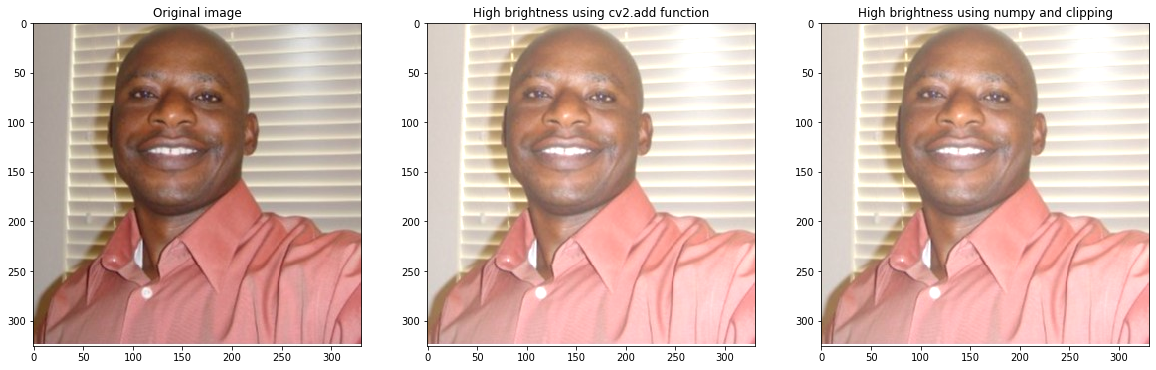

In [25]:
# brightness offset
brightness_offset = 50

# add the offset for increasing brightness
bright_high_opencv = cv2.add(sample_image, np.ones(sample_image.shape, dtype = 'uint8') * brightness_offset)

bright_high_int32 = np.int32(sample_image) + brightness_offset
bright_high_int32_clipped = np.clip(bright_high_int32, 0, 255)

# display the outputs
plt.figure(figsize=[20, 20])
plt.subplot(131)
plt.imshow(sample_image[..., ::-1])
plt.title("Original image")

plt.subplot(132)
plt.imshow(bright_high_opencv[..., ::-1])
plt.title("High brightness using cv2.add function")

plt.subplot(133)
plt.imshow(bright_high_int32_clipped[..., ::-1])
plt.title("High brightness using numpy and clipping")

plt.show()